In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../data/customer_churn_dataset.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

## The dataframe has **7043** *rows* and **21** *columns*

In [5]:
# Let's see the values in columns and info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
# I guess 'SeniorCitizen' should be categorical feature
df['SeniorCitizen']=df['SeniorCitizen'].map({0:'No',1:'Yes'})

In [7]:
numerical_features=[]
for i in df.columns:
    if df[i].dtype=='int64' or df[i].dtype=='float64':
        numerical_features.append(i)

In [8]:
print(numerical_features)

['tenure', 'MonthlyCharges', 'TotalCharges']


In [9]:
categorical_features=[]
for i in df.columns:
    if df[i].dtype=='object':
        categorical_features.append(i)

In [10]:
print(categorical_features)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [11]:
# I don't need 'customerID' column, so I will drop it
df.drop(columns=['customerID'],inplace=True)
categorical_features.remove('customerID')

In [12]:
for i in df.columns:
    print(i," : ",df[i].nunique())
    

gender  :  2
SeniorCitizen  :  2
Partner  :  2
Dependents  :  2
tenure  :  73
PhoneService  :  2
MultipleLines  :  3
InternetService  :  3
OnlineSecurity  :  3
OnlineBackup  :  3
DeviceProtection  :  3
TechSupport  :  3
StreamingTV  :  3
StreamingMovies  :  3
Contract  :  3
PaperlessBilling  :  2
PaymentMethod  :  4
MonthlyCharges  :  1585
TotalCharges  :  6530
Churn  :  2


## Let's explore null values in our dataset.


In [13]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### we have some rows missing in TotalCharges column. We know 
***TotalCharges= MonthlyCharges * tenure***

In [14]:
x=df['MonthlyCharges']*df['tenure']


In [15]:
df['TotalCharges']=df['TotalCharges'].fillna(x)

In [16]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


## Let's get into univariate analysis.

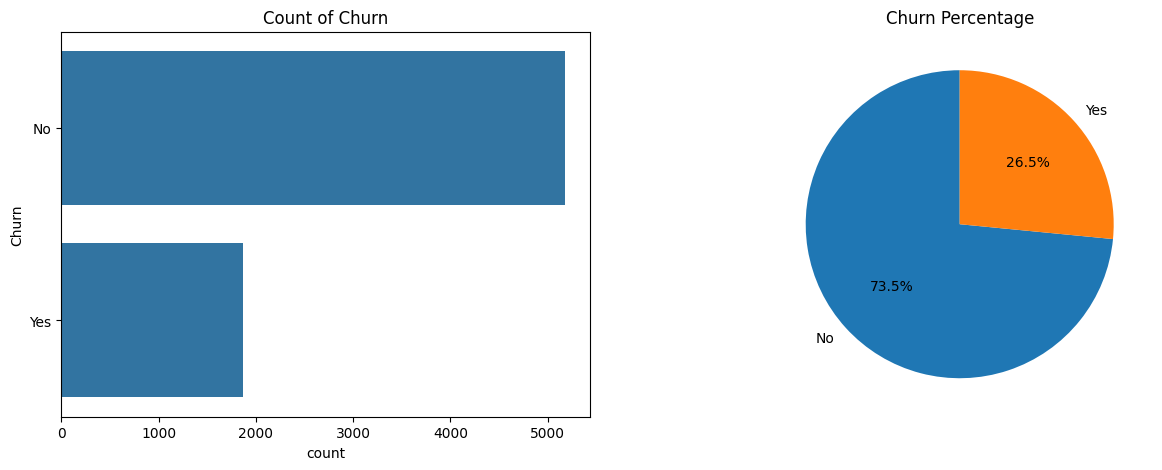

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.countplot(df['Churn'],ax=ax1)
ax1.set_title('Count of Churn')
plt.pie(df['Churn'].value_counts(),labels=df['Churn'].unique(),autopct='%1.1f%%',startangle=90)
ax2.set_title('Churn Percentage')
plt.show()

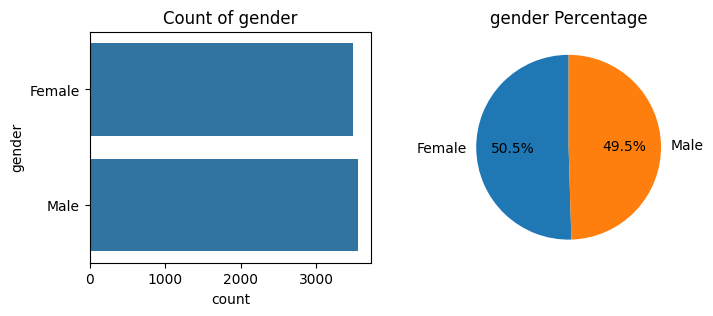

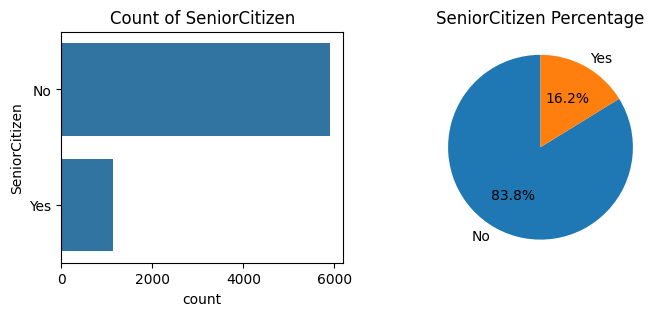

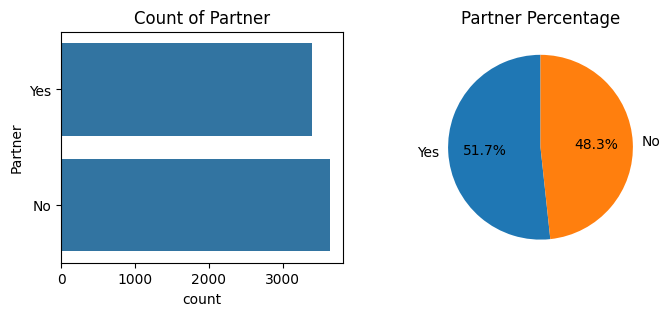

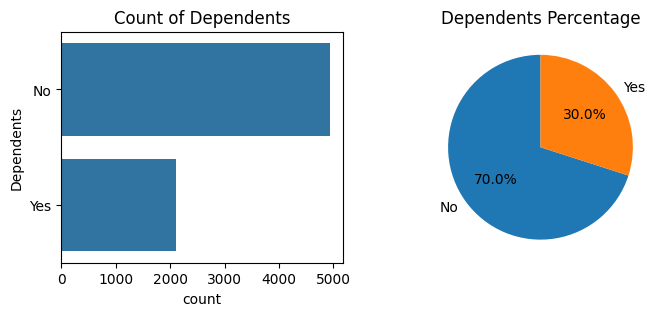

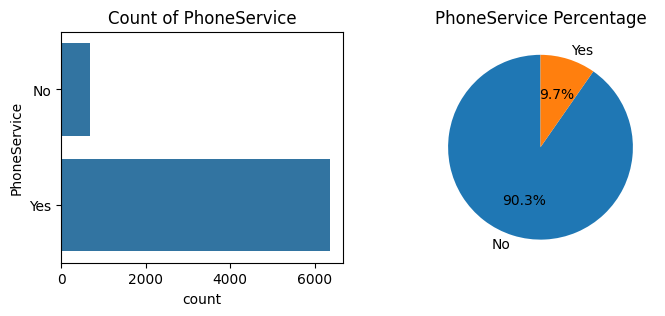

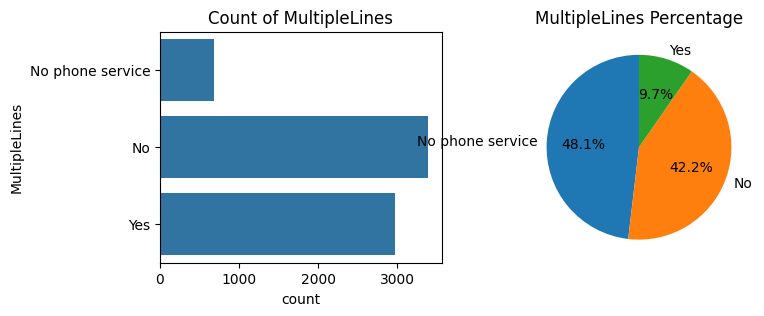

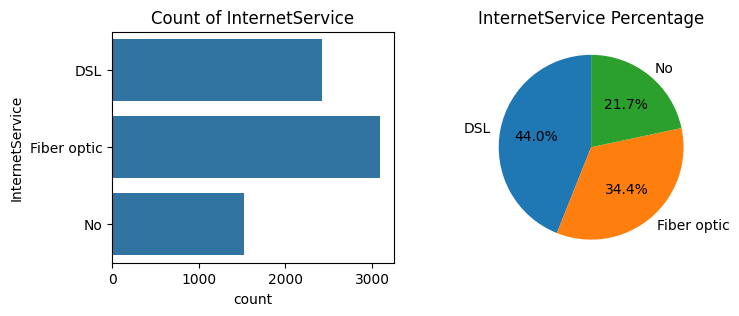

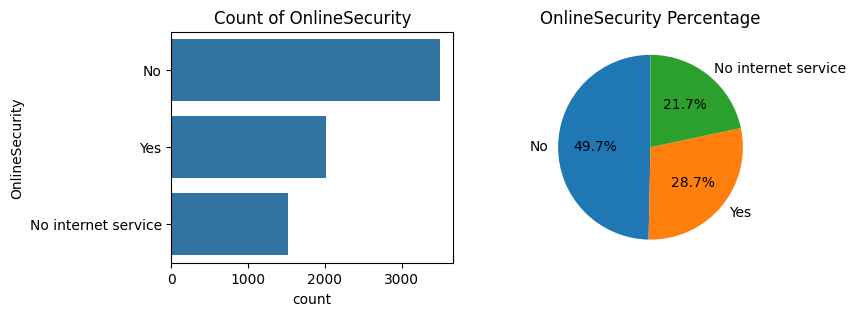

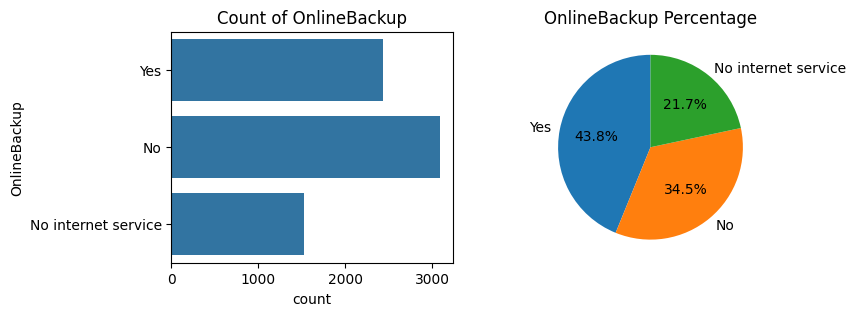

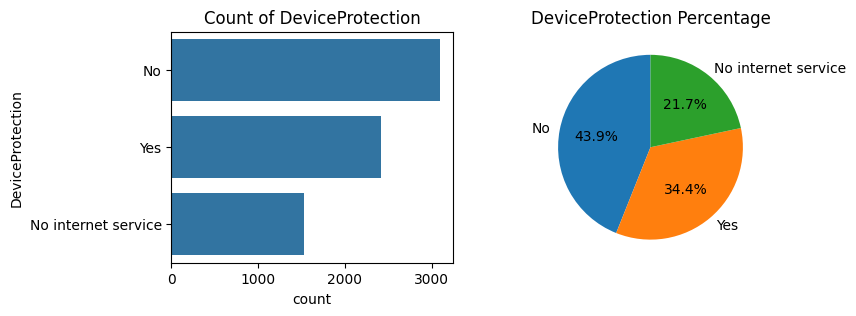

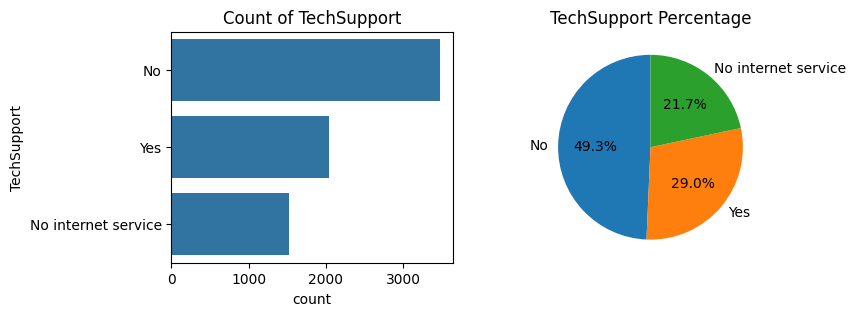

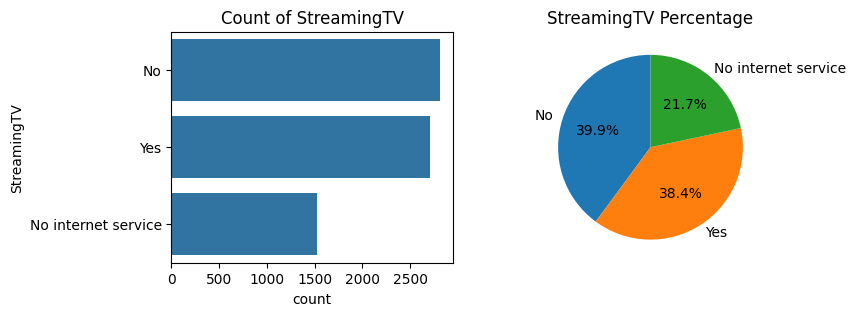

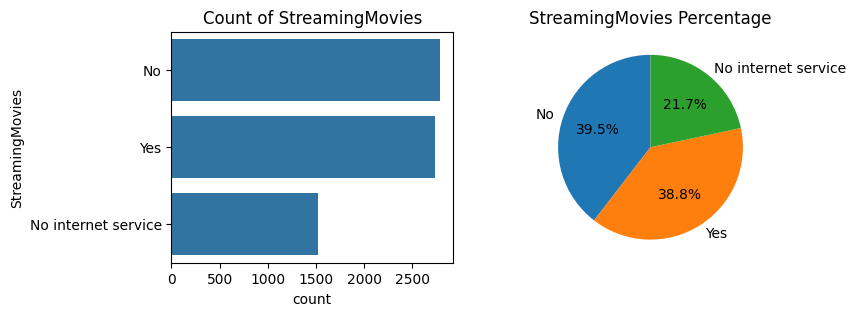

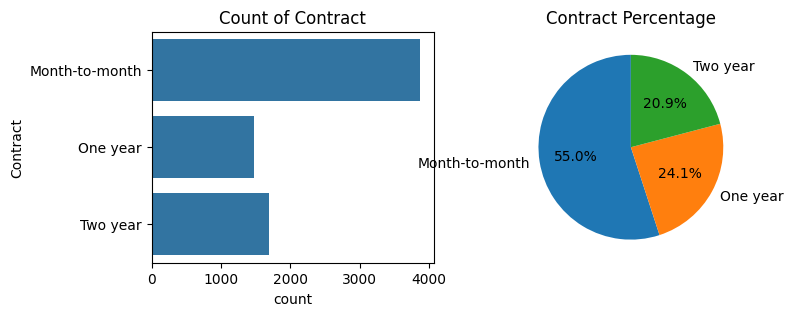

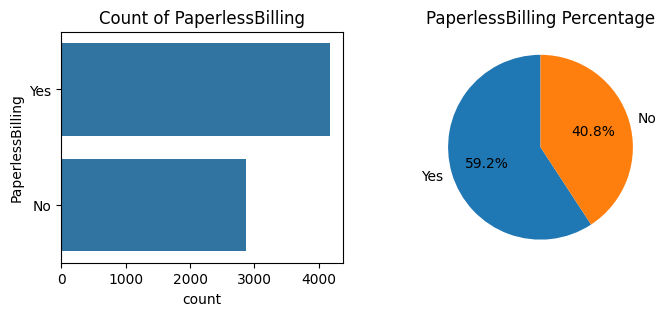

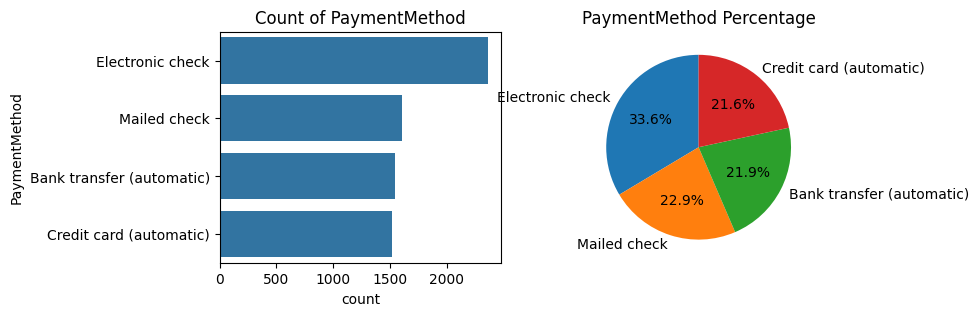

In [19]:
for i in categorical_features[:-1]:
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,3))
    sns.countplot(df[i],ax=ax1)
    ax1.set_title(f'Count of {i}')
    plt.pie(df[i].value_counts(),labels=df[i].unique(),autopct='%1.1f%%',startangle=90)
    ax2.set_title(f'{i} Percentage')
    plt.show()

### **Univariate on Numerical variables**

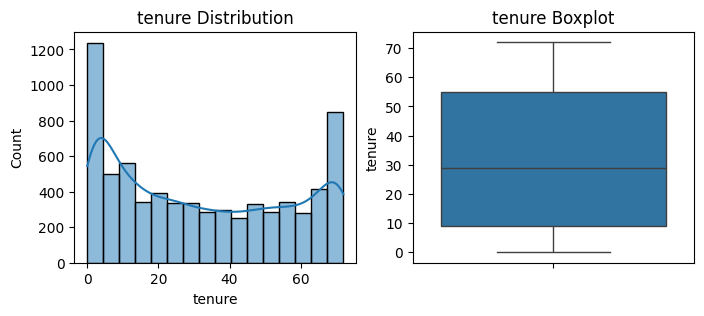

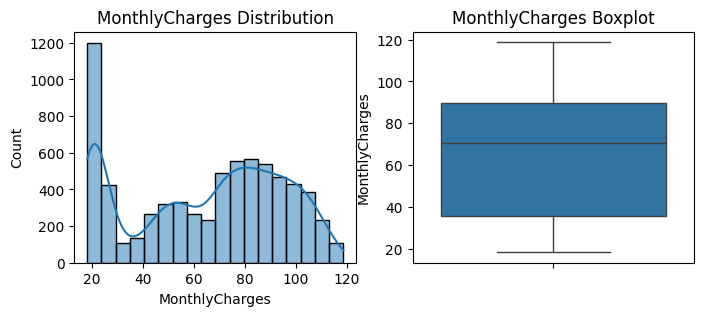

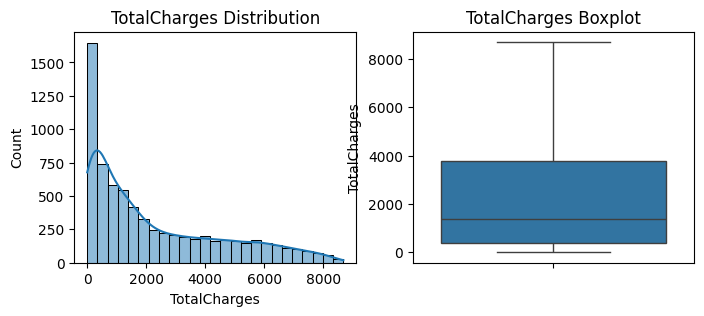

In [20]:
for i in numerical_features:
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,3))
    sns.histplot(df[i],kde=True,ax=ax1)
    ax1.set_title(f'{i} Distribution')
    sns.boxplot(df[i],ax=ax2)
    ax2.set_title(f'{i} Boxplot')
    plt.show()

## ***Bivariate Analysis***

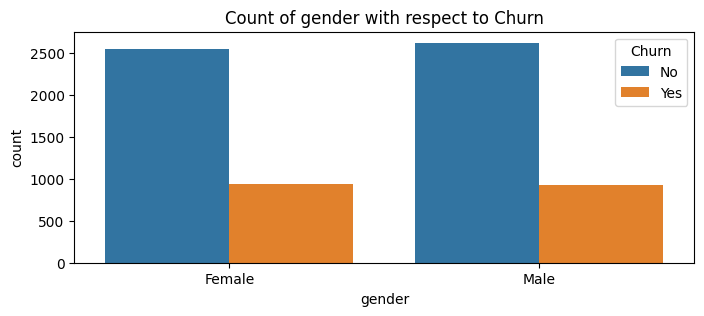

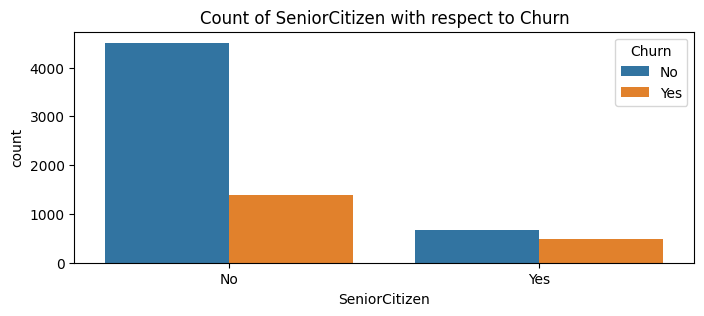

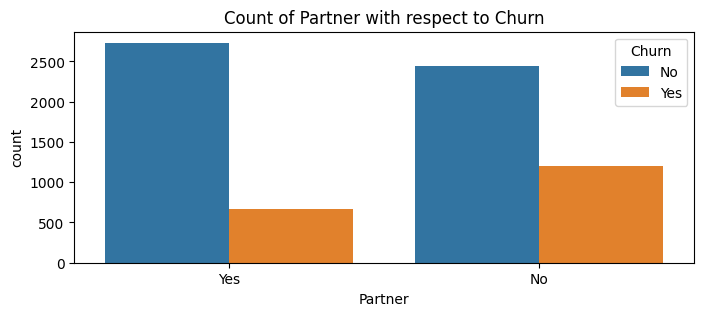

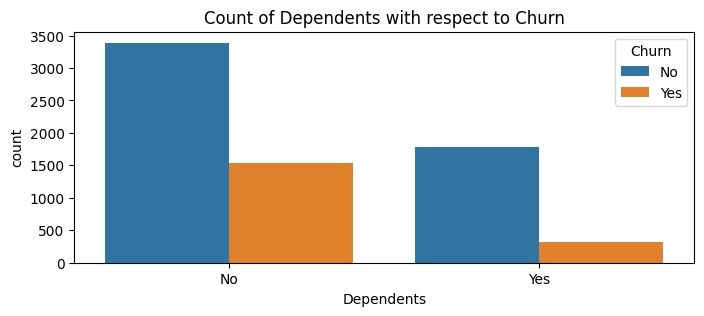

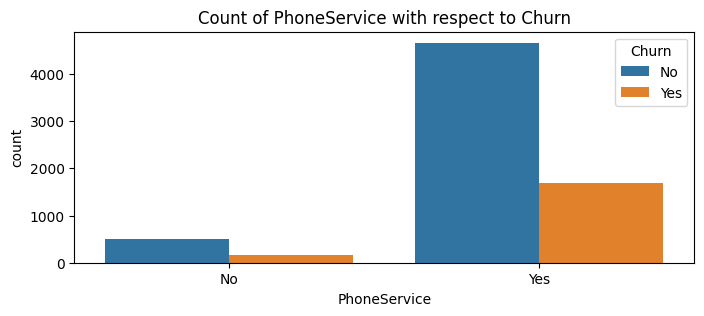

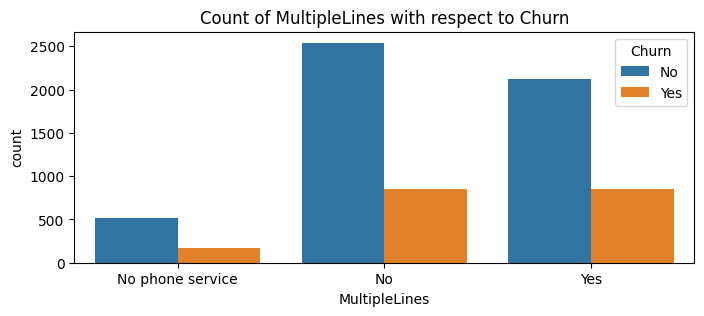

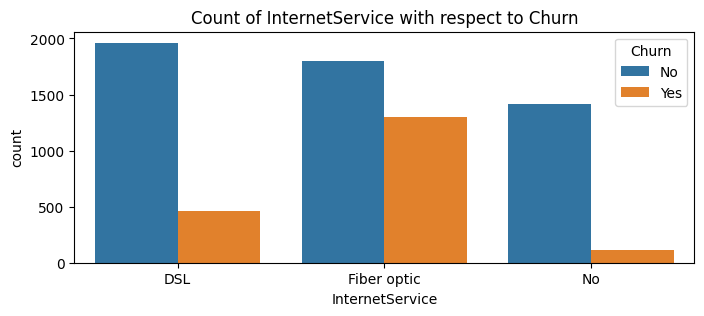

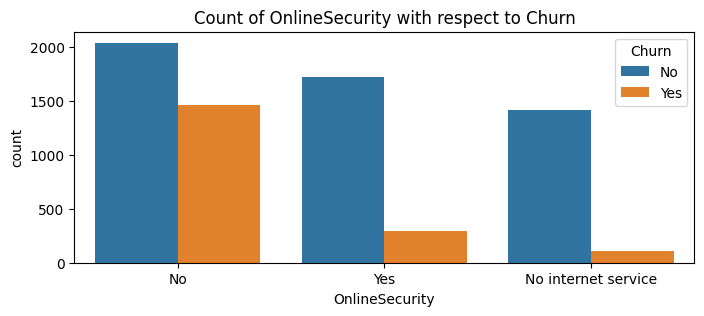

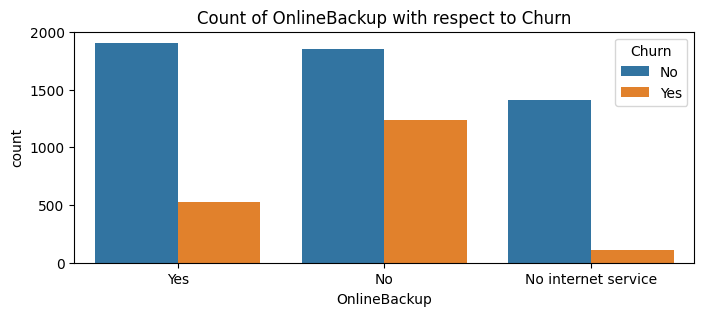

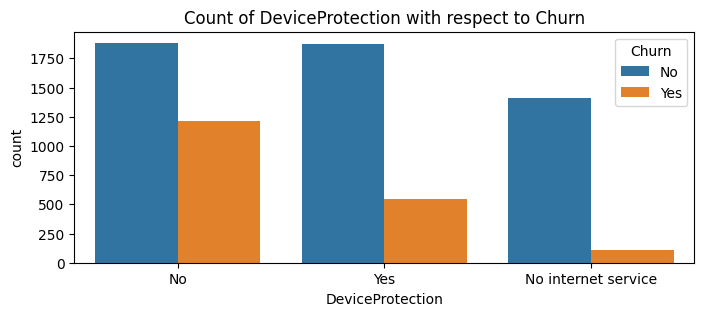

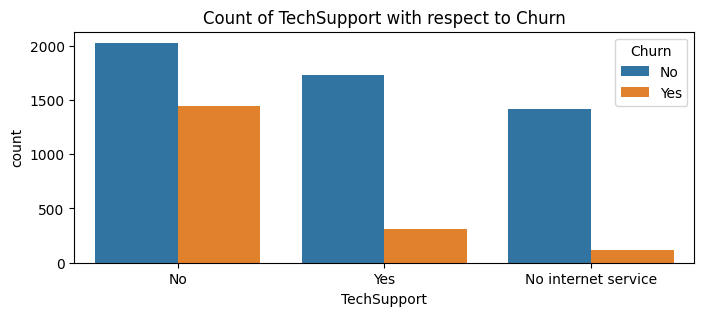

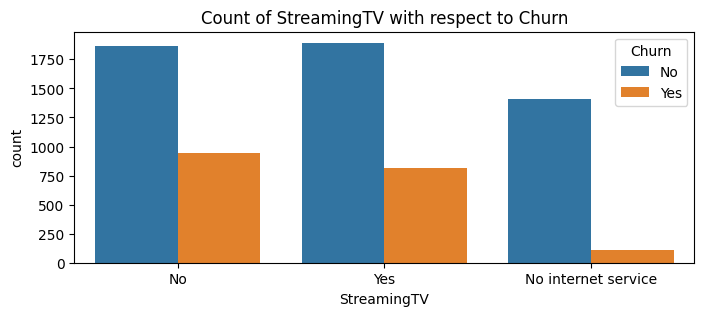

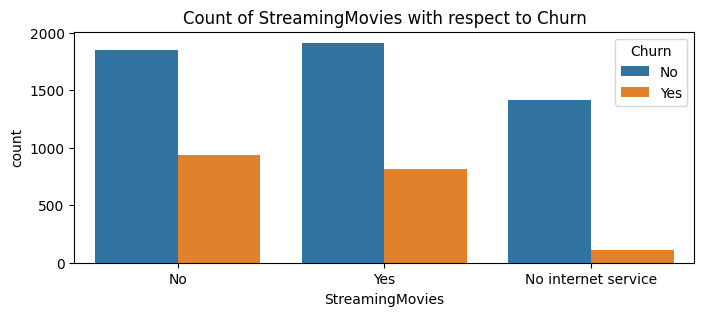

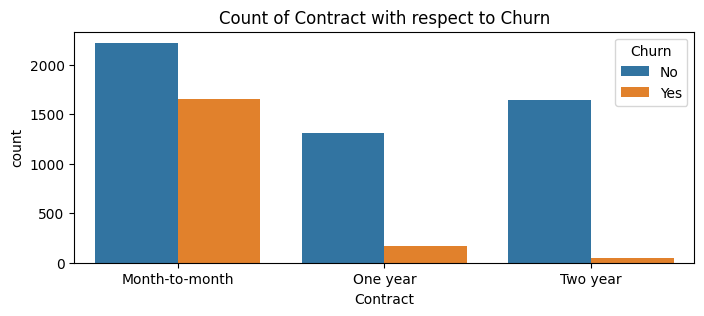

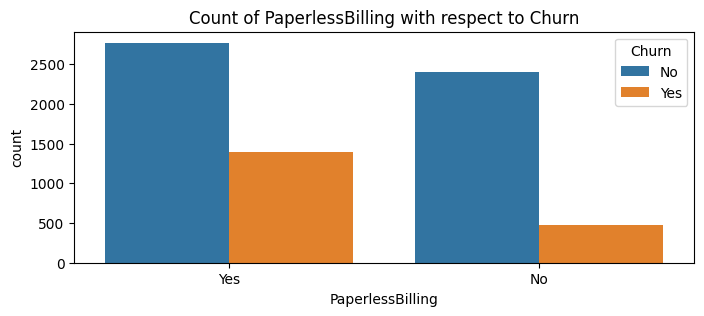

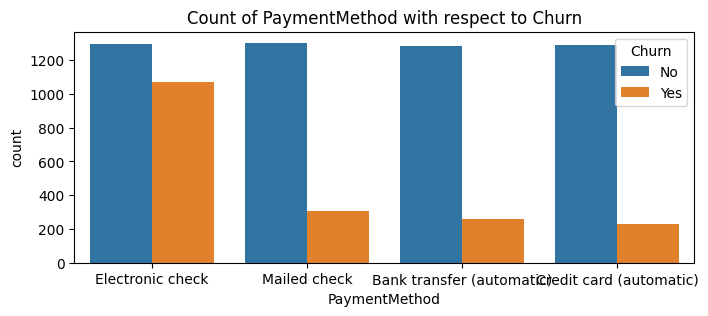

In [21]:
for i in categorical_features[:-1]:
    fig=plt.figure(figsize=(8,3))
    sns.countplot(data=df,x=i,hue='Churn')
    plt.title(f'Count of {i} with respect to Churn')
    plt.show()

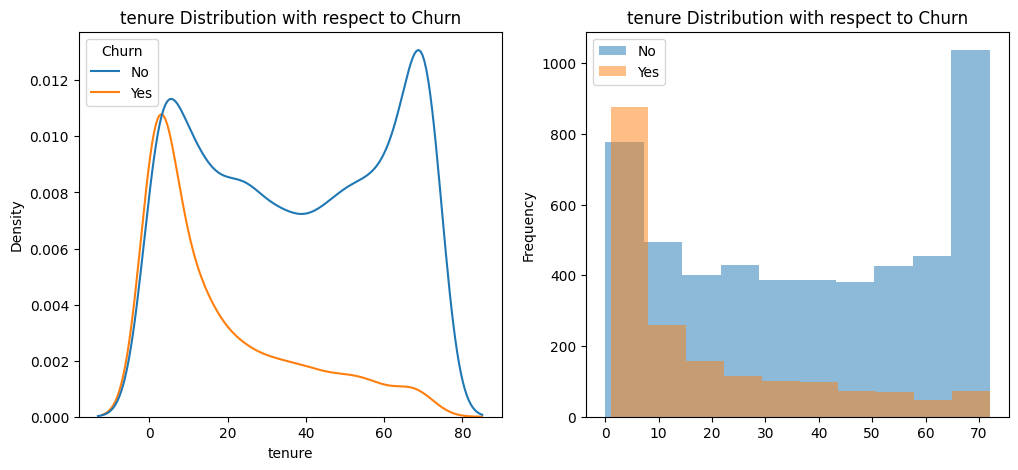

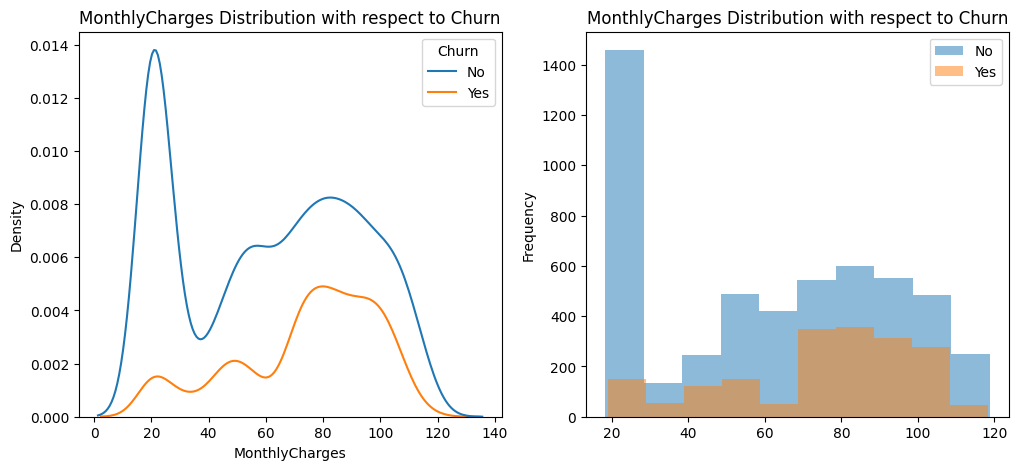

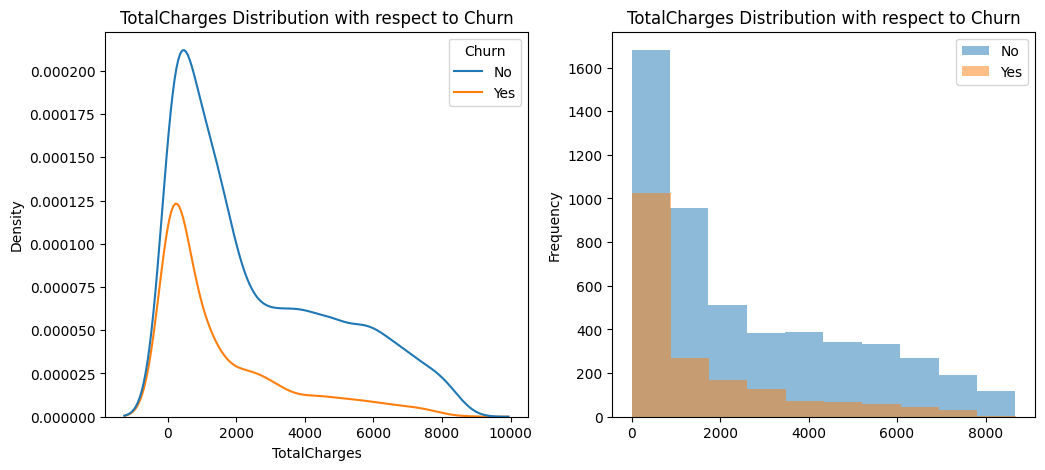

In [22]:
for i in numerical_features:
    fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
    sns.kdeplot(data=df,x=i,hue='Churn',ax=ax1)
    ax1.set_title(f'{i} Distribution with respect to Churn')
    df[i].groupby(df['Churn']).plot(kind='hist',ax=ax2,alpha=0.5,legend=True)
    ax2.set_title(f'{i} Distribution with respect to Churn')
    plt.show()

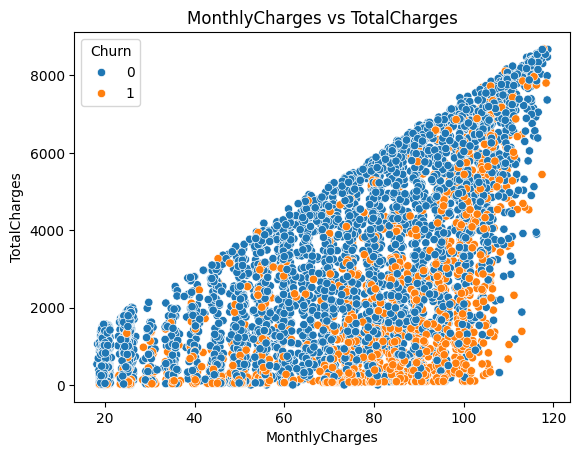

In [56]:
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn')
plt.title('MonthlyCharges vs TotalCharges')
plt.show()

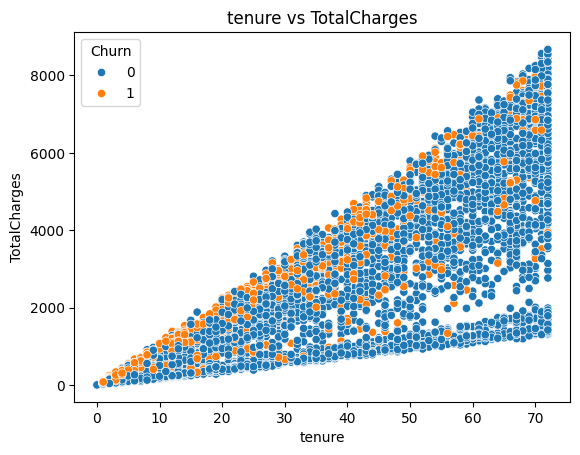

In [57]:
sns.scatterplot(data=df,x='tenure',y='TotalCharges',hue='Churn')
plt.title('tenure vs TotalCharges')
plt.show()

## Multivariate Analysis


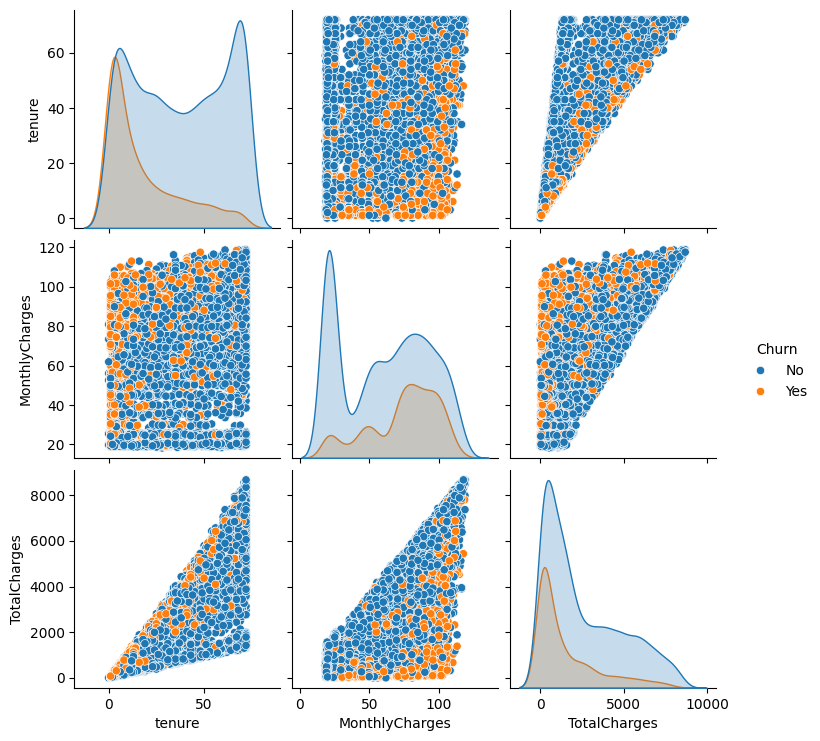

In [23]:
sns.pairplot(data=df,hue='Churn')
plt.show()

## Now since we have done the EDA on the data set we can now move on to Feature Engineering and Column Transformer.

In [24]:
df.to_csv('../data/for_feature_eng.csv', index=False)

In [25]:
features=df.nunique()[df.nunique()<3].index.tolist()

In [26]:
for i in features:
    df[i]=df[i].map({'Yes':1,'No':0})
    

In [27]:
df[features].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,NaN,0,1,0,0,1,0
1,NaN,0,0,0,1,0,0
2,NaN,0,0,0,1,1,1
3,NaN,0,0,0,0,0,0
4,NaN,0,0,0,1,1,1


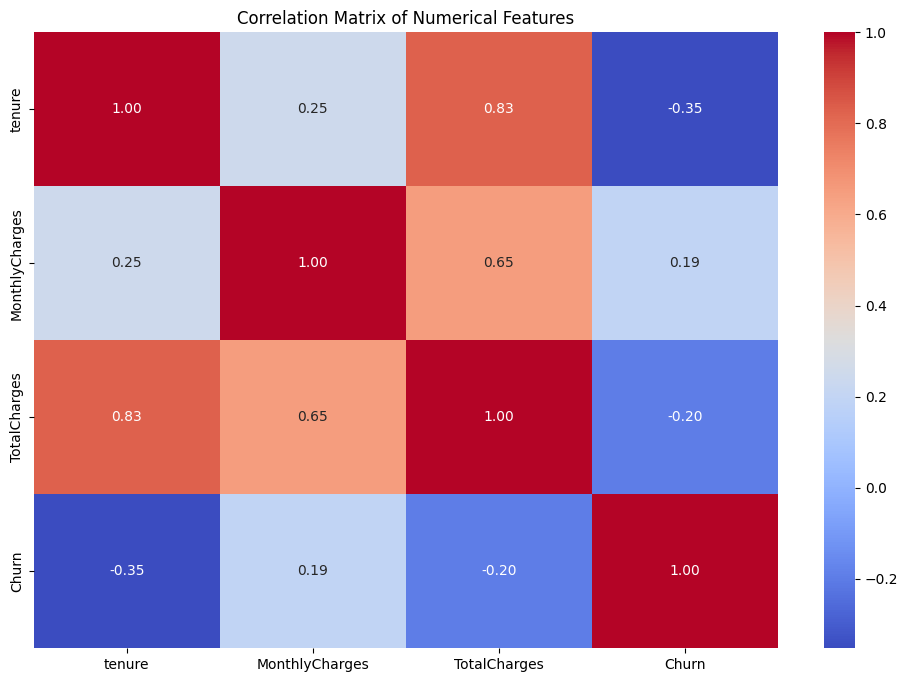

In [28]:
plt.figure(figsize=(12, 8))
corr = df[numerical_features+['Churn']].copy()
corr['Churn'] = corr['Churn'].replace({'No': 0, 'Yes': 1})
correlation_matrix = corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [29]:
# Function to detect outliers using IQR
def detect_outliers(df, features):
    outliers = {}
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

# Detect outliers in numerical features
outliers = detect_outliers(df, numerical_features)

# Print outliers
for feature, outlier_df in outliers.items():
    print(f"Outliers in {feature}:")
    print(outlier_df)
    print("\n")

Outliers in tenure:
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


Outliers in MonthlyCharges:
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


Outliers in TotalCharges:
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []




In [33]:
df['approx_TotalCharges']=df['MonthlyCharges']*df['tenure']


In [39]:
df['ratio'] = df['TotalCharges'] / df['approx_TotalCharges']

In [52]:
tolerance_lower = 0.85
tolerance_upper = 1.2
df['is_approx_equal'] = df['ratio'].between(tolerance_lower, tolerance_upper)

In [53]:
approx_equal_count = df['is_approx_equal'].sum()
total_rows = len(df)

print(f"{approx_equal_count} out of {total_rows} rows have x approximately equal to y * z.")

6930 out of 7043 rows have x approximately equal to y * z.


In [54]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [44]:
print(df[df['Contract']=='Month-to-month'][['TotalCharges','approx_TotalCharges']])

      TotalCharges  approx_TotalCharges
0            29.85                29.85
2           108.15               107.70
4           151.65               141.40
5           820.50               797.20
6          1949.40              1960.20
...            ...                  ...
7033       2625.25              2641.00
7034       6886.25              6897.65
7035       1495.10              1495.30
7040        346.45               325.60
7041        306.60               297.60

[3875 rows x 2 columns]


In [55]:
df[df['ratio'].between(tolerance_lower, tolerance_upper)][['TotalCharges','approx_TotalCharges']]

,TotalCharges,approx_TotalCharges
0,29.85,29.85
1,1889.50,1936.30
2,108.15,107.70
3,1840.75,1903.50
4,151.65,141.40
...,...,...
7038,1990.50,2035.20
7039,7362.90,7430.40
7040,346.45,325.60
7041,306.60,297.60


In [48]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,approx_TotalCharges,ratio,is_approx_equal
0,NaN,0,1,0,1,0,No phone service,DSL,No,Yes,...,No,Month-to-month,1,Electronic check,29.85,29.85,0,29.85,1.000000,True
1,NaN,0,0,0,34,1,No,DSL,Yes,No,...,No,One year,0,Mailed check,56.95,1889.50,0,1936.30,0.975830,True
2,NaN,0,0,0,2,1,No,DSL,Yes,Yes,...,No,Month-to-month,1,Mailed check,53.85,108.15,1,107.70,1.004178,True
3,NaN,0,0,0,45,0,No phone service,DSL,Yes,No,...,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1903.50,0.967034,True
4,NaN,0,0,0,2,1,No,Fiber optic,No,No,...,No,Month-to-month,1,Electronic check,70.70,151.65,1,141.40,1.072489,True
